In [1]:
import numpy as np
import sympy
import sympy.stats
from matplotlib import pyplot as plt

import common

In [2]:
num_dims = 10

In [3]:
theta_0 = np.matrix(np.ones(num_dims)).T
theta_star = np.matrix(np.zeros(num_dims)).T

In [4]:
def skewed_quartic_loss_func(theta):
    '''From example 6.6'''
    num_dims = theta.size
    b_mat = np.triu(np.ones([num_dims,num_dims])) / num_dims
    b_mat_theta = b_mat @ theta

    loss_val = (
        (b_mat_theta.T @ b_mat_theta)[0,0]
        +
        np.sum(np.power(b_mat_theta, 3)) / 10
        +
        np.sum(np.power(b_mat_theta, 4)) / 100
    )
    
    return loss_val

In [5]:
def skewed_quartic_grad_loss_func(theta):
    '''
    g(theta) = (
        2B^T B theta
        + 3/10 * sum([B theta]_i^2 b_i)
        + 4/10 * sum([B theta]_i^3 b_i)
    )
    
    where b_i is the i^th column of B
    '''
    num_dims = theta.size
    b_mat = np.triu(np.ones([num_dims,num_dims])) / num_dims
    b_mat = np.matrix(b_mat)
    b_mat_theta = b_mat @ theta

    grad_loss_val = (
        2 * b_mat.T @ b_mat_theta
        +
        (3/10) * np.sum(
            [
                b_mat_theta[ii,0] ** 2 * b_mat[:,ii]
                for ii in range(num_dims)
            ],
            axis=1,
        )
        +
        (4/100) * np.sum(
            [
                b_mat_theta[ii,0] ** 3 * b_mat[:,ii]
                for ii in range(num_dims)
            ],
            axis=1,
        )
    )

    return grad_loss_val

In [6]:
skewed_quartic_loss_func(theta_0)

4.177833

In [7]:
skewed_quartic_grad_loss_func(theta_0)

matrix([[0.234   ],
        [0.434432],
        [0.603744],
        [0.744288],
        [0.85832 ],
        [0.948   ],
        [1.015392],
        [1.062464],
        [1.091088],
        [1.10304 ]])

In [8]:
skewed_quartic_loss_func(theta_star)

0.0

In [9]:
skewed_quartic_grad_loss_func(theta_star)

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [10]:
num_iteration=300
num_realizations=1_000

# num_iteration=1_000
# num_realizations=200

# num_iteration=2
# num_realizations=5

In [11]:
sigma = 0.1
noise_dist = sympy.stats.MultivariateNormal(
    r'\boldsymbol{e}',
    mu=sympy.zeros(num_dims,1),
    sigma=sigma**2 * sympy.eye(num_dims),
)

In [12]:
theta_data = [
    common.basic_root_finding(
        noisy_grad_loss_func=common.make_func_with_additive_noise(
            func=skewed_quartic_grad_loss_func,
            noise_dist=noise_dist,
        ),
        a_k_func=lambda k_index: 1/(k_index+1+100)**(0.501),
        random_state=np.random.RandomState(seed=r_index),
        num_iteration=num_iteration,
        theta_0=theta_star,
    )
    for r_index in range(num_realizations)
]

Mean Theta N Error     : 0.290217217108704
Mean Theta Bar N Error : 0.20133105720443498
Mean Theta N Bar Error < Mean Theta N Error: True


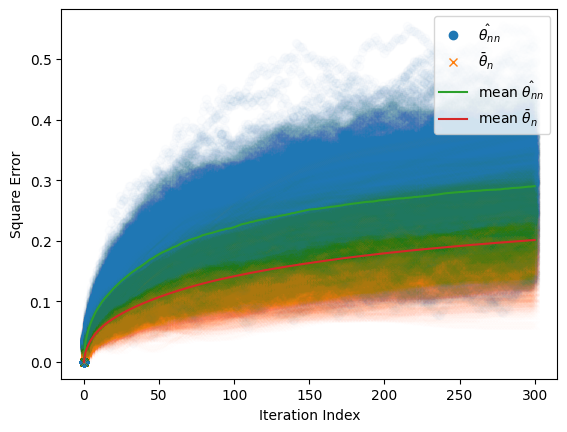

In [13]:
fig1, ax1 = common.plot_error_data(
    theta_data,
    theta_star,
    # ylim=[0,0.0015],
)

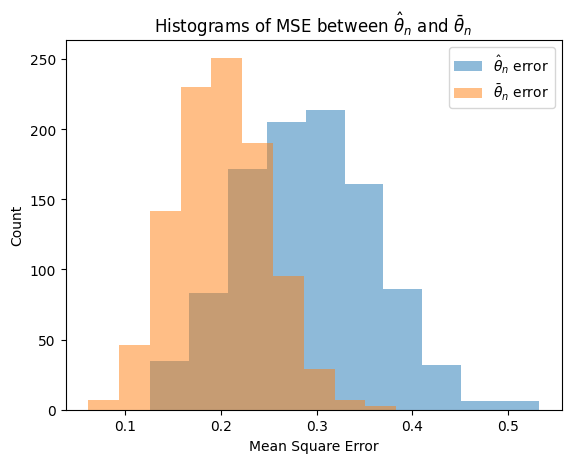

In [14]:
fig2, ax2 = common.plot_error_histogram(
    theta_data,
    theta_star,
)